In [36]:
import numpy as np #Importing necessary datafiles
import pandas as pd
import math
from sklearn.linear_model import LinearRegression

In [37]:
data = pd.read_excel(r'C:\Users\madhu\Desktop\MP1 SI\rainfall data.xlsx')

In [38]:
df = pd.DataFrame(data)

In [71]:
df.head()

,Year,mm,Pred
0,2000,968,999
1,2001,1018,1020
2,2002,1003,1010
3,2003,1088,1100
4,2004,969,1000


In [40]:
mm_list = df.mm.tolist()
print(mm_list)


[968, 1018, 1003, 1088, 969, 1030, 1014, 973, 1095, 1002]


In [41]:
Pred_list = df.Pred.tolist()
print(Pred_list)

[999, 1020, 1010, 1100, 1000, 1046, 1032, 1024, 1021, 945]


In [52]:
diff = []
for i in range(0,len(mm_list)):
    k = (mm_list[i]-Pred_list[i])**2
    diff.append(k)
        
        

In [53]:
diff

[961, 4, 49, 144, 961, 256, 324, 2601, 5476, 3249]

In [59]:
from statistics import mean 
MSE = mean(diff)

In [60]:
print("Mean squared Error for the available rainfall data is:",MSE," in mm.")

Mean squared Error for the available rainfall data is: 1402.5  in mm.


In [61]:
X = df[['Year']]
Y = df['mm']
model = LinearRegression()
model.fit(X,Y)
print('intercept:',model.intercept_)
print('coefficient:',model.coef_)

intercept: -5471.290909090908
coefficient: [3.23636364]


In [62]:
predict = model.predict([[2010]])

In [63]:
print("Rain fall predicted for the year 2010:",predict)

Rain fall predicted for the year 2010: [1033.8]


In [64]:
median = df['Year'].median()

In [65]:
predict = model.predict([[median]])

In [69]:
print("Rain fall predicted for the year 2010:",predict)

Rain fall predicted for the year 2010: [1016.]


In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# if using a Jupyter notebook, inlcude:
%matplotlib inline
mu = 1000
sigma = 900
x1 = 940
x2 = 1060

In [95]:
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma

-0.06666666666666667

In [96]:
x = np.arange(z1, z2, 0.001) # range of x in spec
x_all = np.arange(-10, 10, 0.001) # entire range of x, both in and out of spec
# mean = 0, stddev = 1, since Z-transform was calculated
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

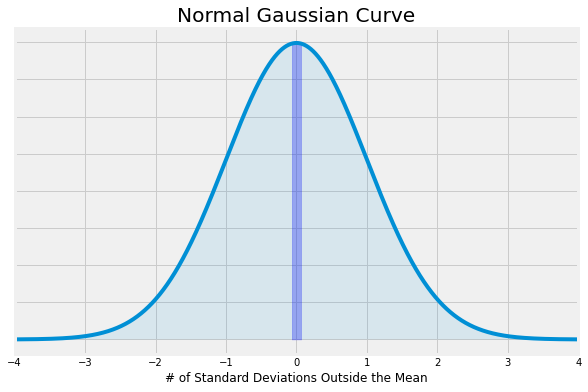

In [97]:
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4,4])
ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_yticklabels([])
ax.set_title('Normal Gaussian Curve')

plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()